In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_digits
digits=load_digits()

In [11]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

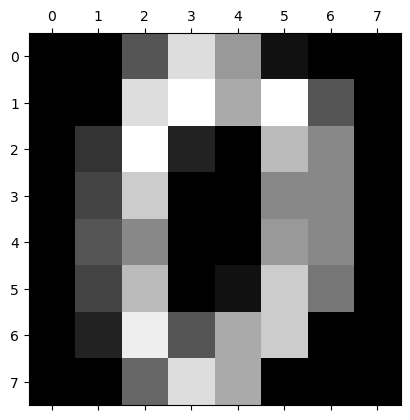

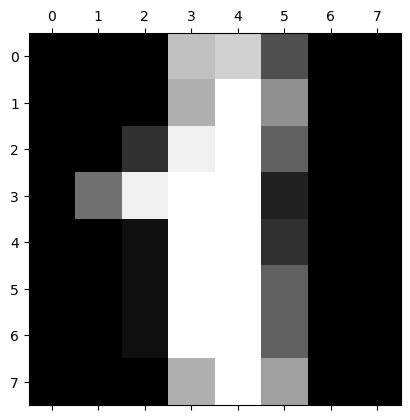

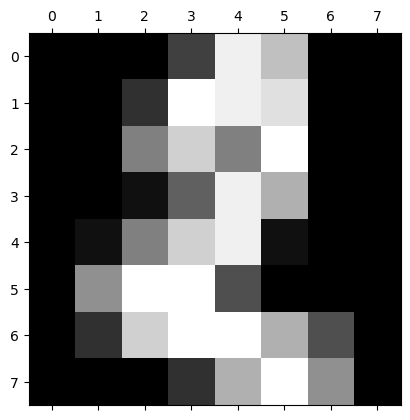

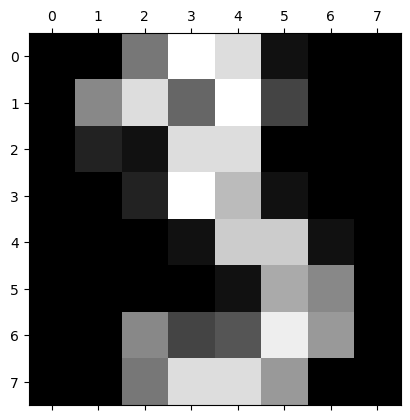

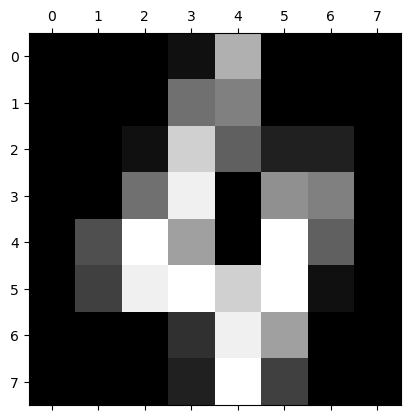

In [21]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [25]:
df= pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [29]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [31]:
from sklearn.model_selection import train_test_split

In [35]:
x= df.drop(['target'],axis='columns')
y=df.target

In [39]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2)

In [41]:
len(x_train)

1437

In [43]:
len(x_test)

360

In [79]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=75)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=75)

In [77]:
model.score(x_test,y_test)

0.975

In [49]:
model.predict(x_train)

array([1, 6, 0, ..., 7, 4, 6])

In [51]:
y_predicted= model.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 34,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 38]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

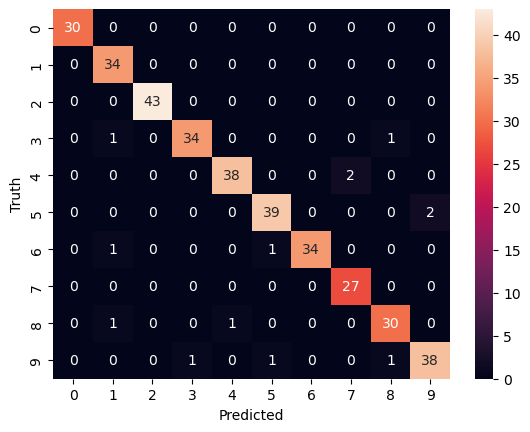

In [97]:
%matplotlib inline 
import  matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')